## Guia da Camada Física
##### O documento tem o objetivo de demostrar o funcionamento da camada física,além de suas funções e ferramentas.

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random
Logger.activate(Logger)

##### Será instaciada a rede e definida a topologia de Grade

2024-06-16 22:31:28,830: Qubit 0 adicionado à memória do Host 0.
2024-06-16 22:31:28,830: Qubit 0 criado com fidelidade inicial 0.6195041276485685 e adicionado à memória do Host 0.
2024-06-16 22:31:28,831: Qubit 1 adicionado à memória do Host 0.
2024-06-16 22:31:28,831: Qubit 1 criado com fidelidade inicial 0.3304740712700147 e adicionado à memória do Host 0.
2024-06-16 22:31:28,832: Qubit 2 adicionado à memória do Host 0.
2024-06-16 22:31:28,832: Qubit 2 criado com fidelidade inicial 0.8479171494208614 e adicionado à memória do Host 0.
2024-06-16 22:31:28,832: Qubit 3 adicionado à memória do Host 0.
2024-06-16 22:31:28,833: Qubit 3 criado com fidelidade inicial 0.1181369421753391 e adicionado à memória do Host 0.
2024-06-16 22:31:28,833: Qubit 4 adicionado à memória do Host 0.
2024-06-16 22:31:28,833: Qubit 4 criado com fidelidade inicial 0.16638591879855313 e adicionado à memória do Host 0.
2024-06-16 22:31:28,834: Qubit 5 adicionado à memória do Host 0.
2024-06-16 22:31:28,834: Qubi

Hosts inicializados
Canais inicializados


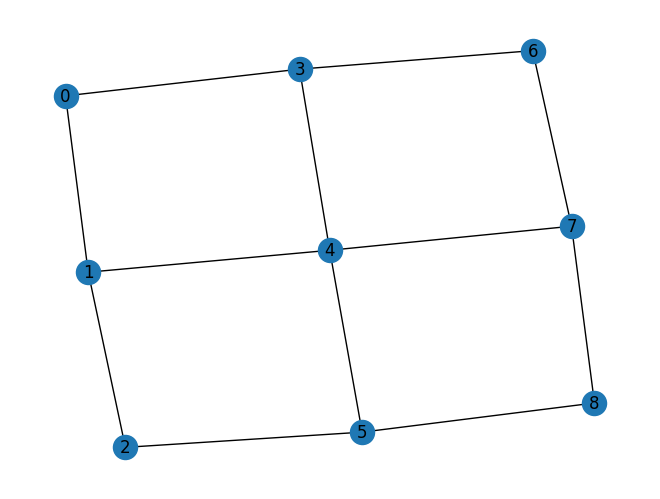

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

##### Selecionando aleatoriamente uma aresta do grafo da rede e deseguinando quem será Alice e Bob

In [3]:
arestas = list(rede.edges)
aresta_aleatorias = random.sample(arestas, 1)[0]
x,y = aresta_aleatorias

alice = rede.get_host(x)
bob = rede.get_host(y)

##### Adicionando qubits aos hosts 

In [ ]:
h1 = Qubit(1)
h2 = Qubit(2)

alice.add_qubit(h1)
bob.add_qubit(h2)

##### Acessando a memória dos Hosts

In [5]:
print(alice.memory)
print(bob.memory)

[<quantumnet.objects.qubit.Qubit object at 0x0000020CB278E510>, <quantumnet.objects.qubit.Qubit object at 0x0000020CB1C496A0>, <quantumnet.objects.qubit.Qubit object at 0x0000020CB26BE5D0>, <quantumnet.objects.qubit.Qubit object at 0x0000020CB278E9C0>, <quantumnet.objects.qubit.Qubit object at 0x0000020CB278E3C0>, <quantumnet.objects.qubit.Qubit object at 0x0000020CB278EC90>, <quantumnet.objects.qubit.Qubit object at 0x0000020CB278EBD0>, <quantumnet.objects.qubit.Qubit object at 0x0000020CB278ED50>, <quantumnet.objects.qubit.Qubit object at 0x0000020CB278E8D0>, <quantumnet.objects.qubit.Qubit object at 0x0000020CB278EF60>, <quantumnet.objects.qubit.Qubit object at 0x0000020CB278EED0>, <quantumnet.objects.qubit.Qubit object at 0x0000020CB278EBA0>, <quantumnet.objects.qubit.Qubit object at 0x0000020CB278F290>, <quantumnet.objects.qubit.Qubit object at 0x0000020CB278F0B0>, <quantumnet.objects.qubit.Qubit object at 0x0000020CB24F0620>, <quantumnet.objects.qubit.Qubit object at 0x0000020CB2

##### Obtendo o útimo qubit de um dos hosts

In [17]:
qub1 = alice.get_last_qubit()


##### Medindo a fidelidade entre dois qubits


In [7]:
#Pode medir a fidelidade por meio dessa função
rede.physical.fidelity_measurement(h1,h2)

2024-06-16 22:31:29,528: A fidelidade entre o qubit Qubit 1 with state None e o qubit Qubit 2 with state None é 0.14034352914743772


0.14034352914743772

##### Medindo a fidelidade de um qubit


In [8]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)

2024-06-16 22:31:29,536: A fidelidade do qubit Qubit 1 with state None é 0.461354314386053


0.461354314386053

##### Criação do protocolo de entrelaçamento entre dois qubits

In [10]:
rede.physical.entanglement_creation_heralding_protocol(alice,bob)

2024-06-16 22:31:29,554: A fidelidade entre o qubit Qubit 79 with state None e o qubit Qubit 2 with state None é 0.038160632480238585
2024-06-16 22:31:29,555: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.


False

##### Realiza-se o primeiro protocolo, on demand, que através da fidelidade inicial e da probabilidade de sucesso do on demand determina o sucesso do ECHP

In [13]:
rede.physical.echp_on_demand(2,5)

2024-06-16 22:31:29,574: A fidelidade do qubit Qubit 59 with state None é 0.991904063513994
2024-06-16 22:31:29,575: A fidelidade do qubit Qubit 119 with state None é 0.888981710136067
2024-06-16 22:31:29,575: A probabilidade de sucesso do ECHP falhou.


False

##### Realiza-se, então, o segundo protocolo, on replay, que através da fidelidade inicial e da probabilidade de sucesso do on replay determina o sucesso do ECHP

In [14]:
rede.physical.echp_on_replay(2,5)

2024-06-16 22:31:29,583: A fidelidade do qubit Qubit 58 with state None é 0.3182829068150824
2024-06-16 22:31:29,584: A fidelidade do qubit Qubit 118 with state None é 0.8624977381547191
2024-06-16 22:31:29,584: A probabilidade de sucesso do ECHP falhou.


False

##### Acessando o canal que mostra as probablidades e os pares eprs


In [15]:
rede.edges[2,5]

{'prob_on_demand_epr_create': 0.7074405529659265,
 'prob_replay_epr_create': 0.8406786627631171,
 'eprs': []}

##### Acessando o dicionario que contém os pares eprs alocados


In [16]:
rede.get_eprs()

{(0, 3): [],
 (0, 1): [],
 (1, 4): [],
 (1, 2): [],
 (2, 5): [],
 (3, 6): [],
 (3, 4): [],
 (4, 7): [],
 (4, 5): [],
 (5, 8): [],
 (6, 7): [],
 (7, 8): []}